In [80]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 113.4 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 165.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 28.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [33]:
#read input data
#df_input = pd.read_csv('input.csv')
df_input = pd.read_csv('input.csv', index_col=0)
#print(df_input.head(2))

In [32]:
#filter input data
indices_to_remove_input = ['experimentalist', 'name main compund acid', 'SMILES main compound acid', 'name 2nd compound acid', 'SMILES 2nd compound acid', 'name 3rd compound acid', 'SMILES 3rd compound acid', 'anode material', 'cathode material', 'time']
filtered_input = df_input.drop(indices_to_remove_input)
filtered_input = filtered_input.fillna(0) # fill  empty cells with 0
filtered_input = filtered_input.transpose() # change positions of columns and rows
#print(filtered_input.head(2))
#print(filtered_input)

In [29]:
#read output data
df_output = pd.read_csv('output_yields.csv', index_col=0)
df_output = df_output.dropna(how='all') # remove empty rows
df_output = df_output.dropna(axis=1, how='all') # remove empty columns
filtered_output = df_output.loc[:, :'21103'] # remove columns after certain column
filtered_output = filtered_output.fillna(0) # fill  empty cells with 0
filtered_output = filtered_output.transpose() # change positions of columns and rows
#print(filtered_output.head(4))
#print(filtered_output)

In [61]:
X = filtered_input.values
Y = filtered_output.values
#print(X)

In [62]:
# split data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# test_size is the fraction of the data to reserve for the test set (e.g., 0.2 for 20%)
# random_state is a seed for the random number generator (use the same value for reproducibility)

In [63]:
# standardize data
scaler = StandardScaler() # Initialize the StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# normalize data with min-max scaling
scaler = MinMaxScaler() # Initialize the MinMaxScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [64]:
kernel = 1.0 * RBF(length_scale=1.0)  # Adjust kernel parameters as needed
gaussian_regressor = GaussianProcessRegressor(kernel=kernel)
gaussian_regressor.fit(X_train, Y_train)

/home/sc.uni-leipzig.de/pr481jlua/.conda/envs/regression1/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1))

In [66]:
Y_predict_train = gaussian_regressor.predict(X_train)  # Replace 'gaussian_regressor' with your model
Y_predict_test = gaussian_regressor.predict(X_test) 

mse_training = mean_squared_error(Y_train, Y_predict_train)
rmse_training = mean_squared_error(Y_train, Y_predict_train, squared=False)
r2_training = r2_score(Y_train, Y_predict_train)

print("MSE on training set:", mse_training)
print("RMSE on training set:", rmse_training)
print("R-squared (R²) Error on training set:", r2_training)


mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
r2_test = r2_score(Y_test, Y_predict_test)

print("MSE on test set:", mse_test)
print("RMSE on test set:", rmse_test)
print("R-squared (R²) Error on test set:", r2_test)

MSE on training set: 1.801923534623996e-23
RMSE on training set: 4.244906989115304e-12
R-squared (R²) Error on training set: 1.0
MSE on test set: 633.0734468047732
RMSE on test set: 25.160950832684627
R-squared (R²) Error on test set: -1.3315979387569796


In [73]:
# Use the `predict` method with return_std=True to get predictions for new data points and standard deviations
mean, std = gaussian_regressor.predict(X_test, return_std=True)
print(mean)
print(std)

[0. 0. 0. 0. 0. 0. 0.]
[23.57020826 23.57020826 23.57020826 23.57020826 23.57020826 23.57020826
 23.57020826]


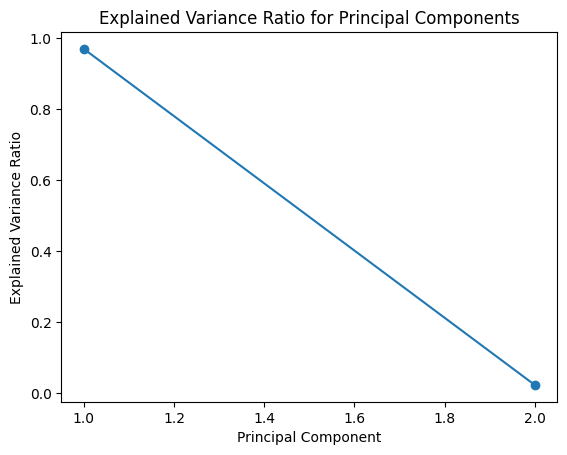

In [83]:
# PCA
# Initialize the PCA model
pca = PCA(n_components=2)  # Specify the number of components you want to retain

# Fit and transform your input data
X_pca = pca.fit_transform(X)

# X_pca now contains the transformed data with reduced dimensions

# You can access the principal components and explained variance
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.show()

In [87]:
# Get the weight of each x feature in each principal component
weights = pca.components_

# Print the weights
for i, pc in enumerate(weights):
    print(f'PC{i+1} weights:', pc**2)

PC1 weights: [3.04375568e-11 4.38988561e-09 2.28112403e-01 3.70203103e-04
 4.08994563e-01 3.41898969e-02 2.44110382e-01 1.75352224e-07
 1.34144480e-03 6.31123112e-08 3.63800442e-07 1.08816460e-05
 8.22180821e-02 8.06420879e-06 5.11945073e-11 5.68827859e-12
 2.72604057e-11 2.13985145e-04 1.44820230e-04 3.76416881e-07
 0.00000000e+00 1.19355484e-63 2.84290875e-04 0.00000000e+00]
PC2 weights: [2.55378274e-04 1.17212296e-06 3.18034623e-03 5.16137671e-06
 7.04942913e-02 6.89794775e-01 1.52848681e-03 2.36628669e-07
 1.49916040e-03 7.95955975e-08 5.59153414e-06 1.32789173e-03
 1.14628562e-03 9.79171494e-05 5.97602065e-09 6.64002294e-10
 7.24936187e-06 3.98049711e-03 1.95187376e-01 2.18793560e-02
 0.00000000e+00 2.98834016e-63 9.60874155e-03 0.00000000e+00]


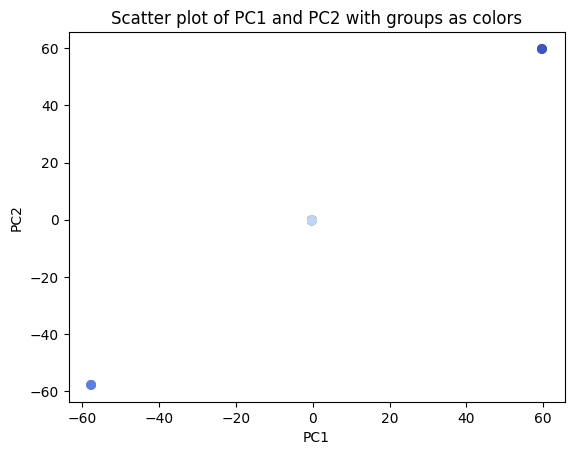

In [96]:
# Get the first two principal components
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

# Create a scatter plot of x1 and x2 with PC1 and PC2 as color
fig, ax = plt.subplots()
ax.scatter(pc1,pc1, c=Y, cmap='coolwarm')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter plot of PC1 and PC2 with groups as colors')
plt.show()